<a href="https://colab.research.google.com/github/srihk/mini-project/blob/main/review_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Environment Setup

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

# Importing defaultdict 
from collections import defaultdict



- `plot_graphs` is a helper function to plot graphs using `matplotlb`.



In [3]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

# Setup input pipeline

- Read the mobile phones reviews dataset csv files into pandas dataframes.

In [4]:
# train_dataset, info = tfds.load('amazon_us_reviews/Mobile_Electronics_v1_00', with_info=True)
items_dataframe = pd.read_csv('/mobile-phones-reviews-dataset/20191226-items.csv')
reviews_dataframe = pd.read_csv('/mobile-phones-reviews-dataset/20191226-reviews.csv')
print("Completed the task: Read the mobile phones reviews dataset csv files into pandas dataframes.")

Completed the task: Read the mobile phones reviews dataset csv files into pandas dataframes.


- Examine the data in `items_dataframe`.


In [5]:
items_dataframe.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


In [6]:
items_dataframe.dtypes

asin              object
brand             object
title             object
url               object
image             object
rating           float64
reviewUrl         object
totalReviews       int64
price            float64
originalPrice    float64
dtype: object

- Examine the data in `reviews_dataframe`.

In [7]:
reviews_dataframe.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [8]:
reviews_dataframe.dtypes

asin             object
name             object
rating            int64
date             object
verified           bool
title            object
body             object
helpfulVotes    float64
dtype: object

- Create a new column `review` from `body` in `reviews_dataframe`.

In [9]:
reviews_dataframe['review'] = reviews_dataframe['body']

- Create labels for all the reviews.

In [10]:
reviews_dataframe['label'] = reviews_dataframe['rating'] // 3

- Separate labels and reviews.

In [11]:
reviews = list(map(str, reviews_dataframe['review']))
labels = reviews_dataframe['label']

- Examine the contents of the dataframe `labels`.

In [12]:
labels.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

- Divide the dataset for training and testing in the ratio 80:20.
- Load the data using `tf.data.Dataset`.

In [13]:
dataset_size = len(reviews)
train_dataset = tf.data.Dataset.from_tensor_slices((reviews[:(dataset_size * 80) // 100], labels.values[:(dataset_size * 80) // 100]))
test_dataset = tf.data.Dataset.from_tensor_slices((reviews[(dataset_size * 80) // 100:], labels.values[(dataset_size * 80) // 100:]))
print("Completed the task: Divide the dataset for training and testing in the ratio 80:20. Size of the total dataset:", dataset_size, "(Train (80%):", len(train_dataset), "), (Test (20%)", len(test_dataset), ")")
print("Completed the task: Load the data using tf.data.Dataset.")

Completed the task: Divide the dataset for training and testing in the ratio 80:20. Size of the total dataset: 67986 (Train (80%): 54388 ), (Test (20%) 13598 )
Completed the task: Load the data using tf.data.Dataset.


- Examine the contents of `train_dataset`.

In [14]:
print("Length of train_dataset:", len(train_dataset))
print("Element spec:", test_dataset.element_spec)
for review, label in train_dataset.take(5):
  print ('Review: {}, Label: {}'.format(review, label))

Length of train_dataset: 54388
Element spec: (TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))
Review: b"I had the Samsung A600 for awhile which is absolute doo doo. You can read my review on it and detect my rage at the stupid thing. It finally died on me so I used this Nokia phone I bought in a garage sale for $1. I wonder y she sold it so cheap?... Bad: ===> I hate the menu. It takes forever to get to what you want because you have to scroll endlessly. Usually phones have numbered categories so u can simply press the # and get where you want to go. ===> It's a pain to put it on silent or vibrate. If you're in class and it rings, you have to turn it off immediately. There's no fast way to silence the damn thing. Always remember to put it on silent! I learned that the hard way. ===> It's so true about the case. It's a mission to get off and will break ur nails in the process. Also, you'll damage the case each time u try. For some reaso

- Examine the contents of `test_dataset`.

In [15]:
print("Length of test_dataset:", len(test_dataset))
print("Element spec:", test_dataset.element_spec)
for review, label in test_dataset.take(5):
  print ('Review: {}, Label: {}'.format(review, label))

Length of test_dataset: 13598
Element spec: (TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))
Review: b"I have been using this product for a good 3-4 months to give it a proper review. Well, ultimately I'm impressed with this phone and it's capabilities at such a low price, although for it's price it's not bulky or heavy in anyway and has a nice sleek design to give it that higher phone tier feeling. Runs android 8.0, smooth and fluid interface thanks to the 4GB RAM (games run great when using medium settings), a great 12MP camera along with a 5MP AI (dual camera) to increase some aspects of video/ photos, the fingerprint scanner is great and very responsive, and a 1080p resolution to get the most out of your video. The battery life is decent, but thankfully to the USB-C fast charging it will bring the battery back up to 100% in about an hour and a half. The only issue I had with the phone is that when attempting to use the face recogni

- Set the batch size for further processing and feeding.
- Shuffle the data.

In [16]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
print("Completed the task: Set the batch size for further processing and feeding.")
print("Completed the task: Shuffle the data.")

Completed the task: Set the batch size for further processing and feeding.
Completed the task: Shuffle the data.


# Preprocessing

- Generate vocabulary from the reviews from `train_dataset`.
- Set up a text encoder.

In [17]:
VOCAB_SIZE=1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))
print("Completed the task: Generate vocabulary from the reviews from train_dataset.")
print("Complete the task: Set up a text encoder.")

Completed the task: Generate vocabulary from the reviews from train_dataset.
Complete the task: Set up a text encoder.


- Examine the encoded vocabulary.

In [18]:
vocab = np.array(encoder.get_vocabulary())
# Print the first 20 tokens of the generated vocabulary.
vocab[:20]

array(['', '[UNK]', 'the', 'i', 'and', 'phone', 'a', 'it', 'to', 'is',
       'this', 'for', 'of', 'with', 'my', 'in', 'that', 'was', 'on',
       'not'], dtype='<U13')

# Build the model

- The text from the review is first encoded into tokens.
- Then the tokenized text is sent into an embedding layer.
  - The embedding layer stores one vector per word.
  - In this layer the sequences of tokens are converted into sequences of vectors.
  - These vectors can be trained.
  - After a sufficient amount of training, the words with similar meanings will mostly have similar vectors.
- Then, these sequences of vectors are fed into a Recurrent Neural Network.
- Here, we are using a Bidirectional RNN.
  - In a bidirectional RNN, the input sequence is processed in both the directions i.e forward and backward.
- In the end, the RNN grnerates an output vector, which will be processed by a 3 layer dense neural network to finally classify the vector output.

In [19]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

- Compile the model

In [20]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

- Train the model

In [21]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset, validation_steps=30)

Epoch 1/10
850/850 [==============================] - 973s 1s/step - loss: 0.5393 - accuracy: 0.5723 - val_loss: 0.2713 - val_accuracy: 0.8771
Epoch 2/10
850/850 [==============================] - 964s 1s/step - loss: 0.2689 - accuracy: 0.8844 - val_loss: 0.2559 - val_accuracy: 0.8891
Epoch 3/10
850/850 [==============================] - 970s 1s/step - loss: 0.2504 - accuracy: 0.8946 - val_loss: 0.2520 - val_accuracy: 0.8938
Epoch 4/10
850/850 [==============================] - 960s 1s/step - loss: 0.2443 - accuracy: 0.8978 - val_loss: 0.2518 - val_accuracy: 0.8849
Epoch 5/10
850/850 [==============================] - 955s 1s/step - loss: 0.2413 - accuracy: 0.8991 - val_loss: 0.2603 - val_accuracy: 0.8703
Epoch 6/10
850/850 [==============================] - 970s 1s/step - loss: 0.2380 - accuracy: 0.8979 - val_loss: 0.2582 - val_accuracy: 0.8792
Epoch 7/10
850/850 [==============================] - 963s 1s/step - loss: 0.2348 - accuracy: 0.8996 - val_loss: 0.2551 - val_accuracy: 0.8813

- Test the model on the `test_dataset` and find its loss and accuracy.

In [22]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

213/213 [==============================] - 34s 158ms/step - loss: 0.2259 - accuracy: 0.8970
Test Loss: 0.22589832544326782
Test Accuracy: 0.8969701528549194


- Plot a graph of the change in accuracy and loss overtime while training using the variable `history`.

(0.0, 0.42655877098441125)

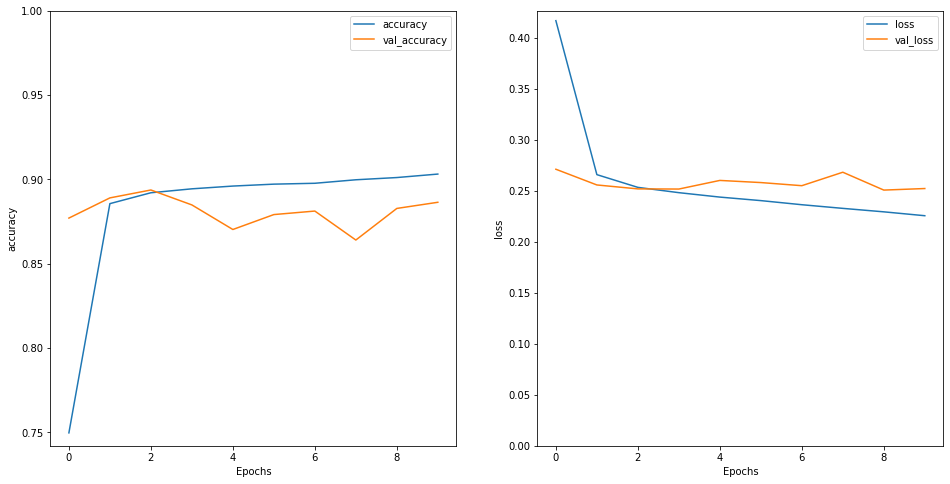

In [23]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history, 'loss')
plt.ylim(0,None)

- Save the model.

In [33]:
model.save('review-sentiment-analysis-model')

INFO:tensorflow:Assets written to: review-sentiment-analysis-model/assets


INFO:tensorflow:Assets written to: review-sentiment-analysis-model/assets


In [34]:
new_model = tf.keras.models.load_model('review-sentiment-analysis-model')

loss, accuracy = new_model.evaluate(test_dataset)

213/213 [==============================] - 35s 153ms/step - loss: 0.2259 - accuracy: 0.8970


# Product Rating Estimation

In [ ]:
item_asins = list(map(str, items_dataframe['asin']))
item_titles = list(map(str, items_dataframe['title']))

review_asins = list(map(str, reviews_dataframe['asin']))
review_bodies = list(map(str, reviews_dataframe['body']))

items_dictionary = {}
reviews_dictionary = defaultdict(list)

for i, j in zip(item_asins, item_titles):
  items_dictionary[i] = j

for i, j in zip(review_asins, review_bodies):
  reviews_dictionary[i].append(j)

item_asin = 'B002WTC1NG'

results_np_array = new_model.predict(np.array(reviews_dictionary[item_asin]))

results = [i[0] for i in results_np_array]

print("Sentiment Analysis Results, Normalized Results")

normalized_results = []

for i in results:
  if (i > 0):
    normalized_results.append(1)
  else:
    normalized_results.append(0)

for i, j in zip(results, normalized_results):
  print(i, '\t\t   ', j)

estimated_rating = ((sum(normalized_results) / len(normalized_results)) * 5)

print("Product Name:", items_dictionary[item_asin])
print("Estimated Rating:", estimated_rating)

Sentiment Analysis Results, Normalized Results
1.8601956 		    1
4.935422 		    1
6.810992 		    1
2.2435498 		    1
-1.7549433 		    0
9.245282 		    1
1.1793336 		    1
-2.9701366 		    0
9.530838 		    1
-3.4096828 		    0
9.576634 		    1
-1.9304653 		    0
4.211402 		    1
2.0018005 		    1
-0.5342741 		    0
4.405078 		    1
4.6663527 		    1
-2.7833762 		    0
-0.94939756 		    0
-2.207353 		    0
6.110497 		    1
1.1218323 		    1
-1.8603045 		    0
5.121467 		    1
6.4523582 		    1
-2.5298972 		    0
-2.337658 		    0
5.1258235 		    1
0.6134148 		    1
2.24244 		    1
-2.7382278 		    0
5.4295955 		    1
-4.4795485 		    0
3.9550087 		    1
4.588244 		    1
6.599078 		    1
-3.39687 		    0
4.768744 		    1
-1.3451672 		    0
2.0348067 		    1
9.679453 		    1
1.3719339 		    1
2.6258936 		    1
0.47177747 		    1
-2.4146276 		    0
-1.0219309 		    0
8.028047 		    1
-1.5716325 		    0
-3.1849573 		    0
2.999451 		    1
-0.6905644 		    0
0.26553708 		    1
-0.71492386 		 